In [78]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
pandas.options.display.float_format = '{:,.3f}'.format

In [45]:
from evaluate import load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix

In [3]:
from v1 import data

# Data details

In [4]:
model = load("output/models/v1.h5")

In [5]:
train, test = data()

Found 270 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [6]:
results = get_results(model, test)

In [26]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)

# Accuracy and loss

In [7]:
accuracy, loss = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.6194149818218929
Loss: 0.7464788740789386


# Confusion matrix

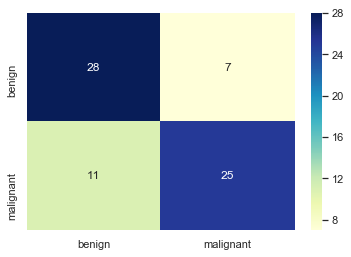

In [8]:
plot_confusion_matrix(test, results)

In [77]:
stats = calculate_confusion_matrix_stats(test, results)
pandas.DataFrame(stats, index=test.class_indices)

,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
benign,28,25,11,7,0.800,0.694,0.718,0.781,0.306,0.200,0.282,0.747,0.745
malignant,25,28,7,11,0.694,0.800,0.781,0.718,0.200,0.306,0.219,0.747,0.745


# ROC Curve

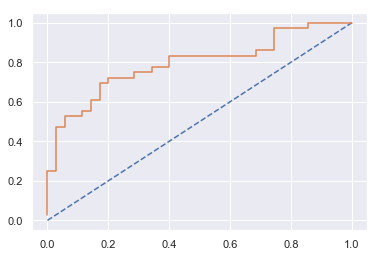

In [9]:
plot_roc_curve(test, results)

In [27]:
print("ROC AUC:", roc_auc_score(labels, probabilities))

ROC AUC: 0.7944444444444444


# Precision Recall

In [32]:
print("Average precision:", average_precision_score(labels, probabilities))
print("Precision:", precision_score(labels, predictions), "Recall:", recall_score(labels, predictions))

Average precision: 0.8341232539172625
Precision: 0.78125 Recall: 0.6944444444444444


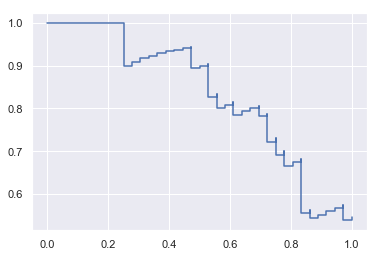

In [33]:
plot_precision_recall(test, results)

In [36]:
print("PR AUC:", calculate_pr_auc(test, results))

PR AUC: 0.8316339094464174


# F1 Score

In [34]:
print("F1 score:", f1_score(labels, predictions))

F1 score: 0.7352941176470588


In [9]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')